In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Crimes.csv')
print(df.head())

      CASE#     DATE  OF OCCURRENCE                 BLOCK  IUCR  \
0  JG497095  11/08/2023 08:50:00 PM   025XX N KEDZIE BLVD  0810   
1  JG496991  11/08/2023 03:14:00 PM   0000X W CHICAGO AVE  0560   
2  JG497145  11/08/2023 10:55:00 PM       019XX W 47TH ST  051A   
3  JH179051  03/07/2024 02:15:00 PM      070XX S STATE ST  0820   
4  JH178785  03/07/2024 04:53:00 AM  077XX S CARPENTER ST  0810   

   PRIMARY DESCRIPTION  SECONDARY DESCRIPTION  LOCATION DESCRIPTION ARREST  \
0                THEFT              OVER $500                STREET      N   
1              ASSAULT                 SIMPLE                STREET      N   
2              ASSAULT   AGGRAVATED - HANDGUN              SIDEWALK      N   
3                THEFT         $500 AND UNDER    GROCERY FOOD STORE      Y   
4                THEFT              OVER $500                STREET      N   

  DOMESTIC  BEAT  WARD FBI CD  X COORDINATE  Y COORDINATE   LATITUDE  \
0        N  1414  35.0     06     1154609.0     1916759.

In [3]:
print(df.columns)

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [4]:
crime_df = pd.DataFrame(df)

In [5]:
crime_df.rename(columns = {'DATE OF OCCURRENCE':'DATE'}, inplace = True)

In [6]:
print(crime_df.columns)

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       ' LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [7]:
print(df.isnull().sum())

CASE#                        0
DATE  OF OCCURRENCE          0
BLOCK                        0
 IUCR                        0
 PRIMARY DESCRIPTION         0
 SECONDARY DESCRIPTION       0
 LOCATION DESCRIPTION     1173
ARREST                       0
DOMESTIC                     0
BEAT                         0
WARD                         2
FBI CD                       0
X COORDINATE                91
Y COORDINATE                91
LATITUDE                    91
LONGITUDE                   91
LOCATION                    91
dtype: int64


In [8]:
missing_data = df.isnull().mean() * 100
print(missing_data[missing_data > 0])

 LOCATION DESCRIPTION    0.453663
WARD                     0.000774
X COORDINATE             0.035195
Y COORDINATE             0.035195
LATITUDE                 0.035195
LONGITUDE                0.035195
LOCATION                 0.035195
dtype: float64


In [9]:
df[' LOCATION DESCRIPTION'].fillna('Unknown', inplace=True)

In [10]:
df.rename(columns = {' LOCATION DESCRIPTION':'LOCATION DESCRIPTION'}, inplace = True)

In [11]:
print(df.columns)

Index(['CASE#', 'DATE  OF OCCURRENCE', 'BLOCK', ' IUCR',
       ' PRIMARY DESCRIPTION', ' SECONDARY DESCRIPTION',
       'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC', 'BEAT', 'WARD', 'FBI CD',
       'X COORDINATE', 'Y COORDINATE', 'LATITUDE', 'LONGITUDE', 'LOCATION'],
      dtype='object')


In [12]:
print(df['LOCATION DESCRIPTION'].isnull().sum())

0


In [13]:
df['WARD'].fillna(df['WARD'].median(), inplace=True)

df['X COORDINATE'].fillna(df['X COORDINATE'].median(), inplace=True)
df['Y COORDINATE'].fillna(df['Y COORDINATE'].median(), inplace=True)
df['LATITUDE'].fillna(df['LATITUDE'].median(), inplace=True)
df['LONGITUDE'].fillna(df['LONGITUDE'].median(), inplace=True)

In [14]:
print(df.isnull().sum())

CASE#                      0
DATE  OF OCCURRENCE        0
BLOCK                      0
 IUCR                      0
 PRIMARY DESCRIPTION       0
 SECONDARY DESCRIPTION     0
LOCATION DESCRIPTION       0
ARREST                     0
DOMESTIC                   0
BEAT                       0
WARD                       0
FBI CD                     0
X COORDINATE               0
Y COORDINATE               0
LATITUDE                   0
LONGITUDE                  0
LOCATION                  91
dtype: int64


In [15]:
print(df['LOCATION'].head())

0     (41.927407329, -87.70729439)
1    (41.896671699, -87.628635323)
2    (41.808525157, -87.672792896)
3    (41.766246905, -87.624932618)
4    (41.753347902, -87.650178718)
Name: LOCATION, dtype: object


In [16]:
df['LOCATION'] = df.apply(lambda row: (row['LATITUDE'], row['LONGITUDE']), axis=1)

In [17]:
print(df[['LATITUDE', 'LONGITUDE', 'LOCATION']].head())

    LATITUDE  LONGITUDE                       LOCATION
0  41.927407 -87.707294   (41.927407329, -87.70729439)
1  41.896672 -87.628635  (41.896671699, -87.628635323)
2  41.808525 -87.672793  (41.808525157, -87.672792896)
3  41.766247 -87.624933  (41.766246905, -87.624932618)
4  41.753348 -87.650179  (41.753347902, -87.650178718)


In [18]:
print(df['LOCATION'].isnull().sum())

0


In [19]:
df.rename(columns = {'DATE  OF OCCURRENCE':'DATE'}, inplace = True)
df

,CASE#,DATE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION
0,JG497095,11/08/2023 08:50:00 PM,025XX N KEDZIE BLVD,0810,THEFT,OVER $500,STREET,N,N,1414,35.0,06,1154609.0,1916759.0,41.927407,-87.707294,"(41.927407329, -87.70729439)"
1,JG496991,11/08/2023 03:14:00 PM,0000X W CHICAGO AVE,0560,ASSAULT,SIMPLE,STREET,N,N,1832,42.0,08A,1176106.0,1905725.0,41.896672,-87.628635,"(41.896671699, -87.628635323)"
2,JG497145,11/08/2023 10:55:00 PM,019XX W 47TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,N,N,931,15.0,04A,1164331.0,1873509.0,41.808525,-87.672793,"(41.808525157, -87.672792896)"
3,JH179051,03/07/2024 02:15:00 PM,070XX S STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,Y,N,322,6.0,06,1177506.0,1858207.0,41.766247,-87.624933,"(41.766246905, -87.624932618)"
4,JH178785,03/07/2024 04:53:00 AM,077XX S CARPENTER ST,0810,THEFT,OVER $500,STREET,N,N,612,17.0,06,1170656.0,1853451.0,41.753348,-87.650179,"(41.753347902, -87.650178718)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258557,JG373700,07/01/2023 06:10:00 PM,038XX N Clark ST,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,Unknown,N,N,1923,44.0,11,1167359.0,1925735.0,41.951773,-87.660184,"(41.951772895, -87.660184427)"
258558,JG300737,06/14/2023 12:07:00 PM,087XX S MUSKEGON AVE,141C,WEAPONS VIOLATION,UNLAWFUL USE - OTHER DANGEROUS WEAPON,ALLEY,N,N,423,7.0,15,1196529.0,1847498.0,41.736410,-87.555563,"(41.736409533, -87.555562506)"
258559,JG364916,07/31/2023 12:00:00 AM,064XX S RHODES AVE,0497,BATTERY,AGGRAVATED DOMESTIC BATTERY - OTHER DANGEROUS ...,RESIDENCE,N,Y,312,20.0,04B,1181010.0,1862410.0,41.777700,-87.611960,"(41.777700447, -87.611960085)"
258560,JG305358,06/18/2023 01:05:00 AM,012XX N STATE PKWY,0496,BATTERY,AGGRAVATED DOMESTIC BATTERY - KNIFE / CUTTING ...,APARTMENT,Y,Y,1824,2.0,04B,1176068.0,1908513.0,41.904323,-87.628691,"(41.904322962, -87.628690783)"


In [20]:
df['DATE']= pd.to_datetime(df['DATE'], errors='coerce')

In [21]:
df['year']= df['DATE'].dt.year
df['month'] = df['DATE'].dt.month
df['day_of_week'] = df['DATE'].dt.day_name()

In [22]:
df.columns

Index(['CASE#', 'DATE', 'BLOCK', ' IUCR', ' PRIMARY DESCRIPTION',
       ' SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'year', 'month', 'day_of_week'],
      dtype='object')

In [23]:
df.rename(columns={' PRIMARY DESCRIPTION': 'PRIMARY DESCRIPTION', ' IUCR': 'IUCR', ' SECONDARY DESCRIPTION':'SECONDARY DESCRIPTION'}, inplace=True)

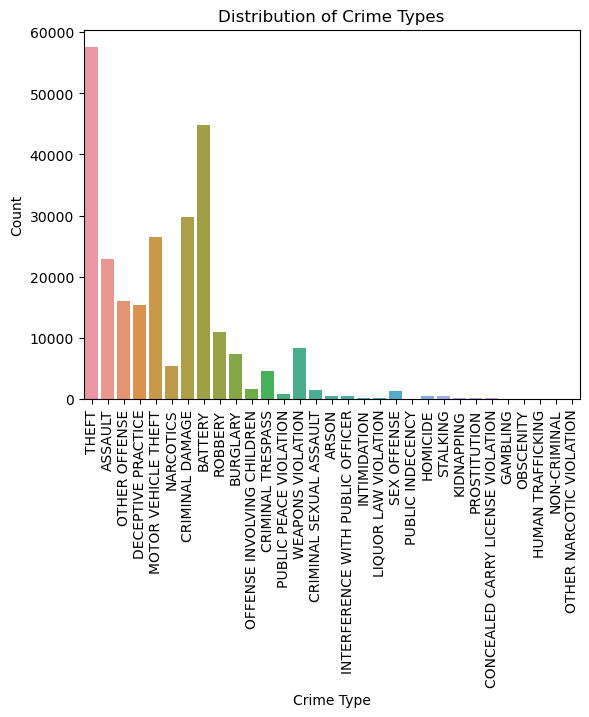

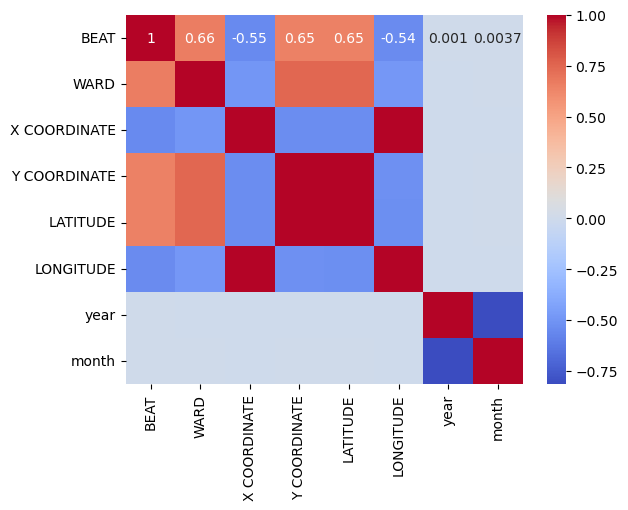

In [24]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=df, x='PRIMARY DESCRIPTION')
plt.title('Distribution of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

corr=df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [25]:
df.head()

,CASE#,DATE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,WARD,FBI CD,X COORDINATE,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,year,month,day_of_week
0,JG497095,2023-11-08 20:50:00,025XX N KEDZIE BLVD,0810,THEFT,OVER $500,STREET,N,N,1414,35.0,06,1154609.0,1916759.0,41.927407,-87.707294,"(41.927407329, -87.70729439)",2023,11,Wednesday
1,JG496991,2023-11-08 15:14:00,0000X W CHICAGO AVE,0560,ASSAULT,SIMPLE,STREET,N,N,1832,42.0,08A,1176106.0,1905725.0,41.896672,-87.628635,"(41.896671699, -87.628635323)",2023,11,Wednesday
2,JG497145,2023-11-08 22:55:00,019XX W 47TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,N,N,931,15.0,04A,1164331.0,1873509.0,41.808525,-87.672793,"(41.808525157, -87.672792896)",2023,11,Wednesday
3,JH179051,2024-03-07 14:15:00,070XX S STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,Y,N,322,6.0,06,1177506.0,1858207.0,41.766247,-87.624933,"(41.766246905, -87.624932618)",2024,3,Thursday
4,JH178785,2024-03-07 04:53:00,077XX S CARPENTER ST,0810,THEFT,OVER $500,STREET,N,N,612,17.0,06,1170656.0,1853451.0,41.753348,-87.650179,"(41.753347902, -87.650178718)",2024,3,Thursday


In [26]:
#count crimes per location
df['crime_count']= df.groupby(['LATITUDE', 'LONGITUDE'])['CASE#'].transform('count')

In [27]:
df['daily_crime_count'] = df.groupby(['DATE'])['CASE#'].transform('count') 

In [28]:
df['monthly_crime_count'] = df.groupby(['year', 'month'])['CASE#'].transform('count')

In [29]:
df.rename(columns = {'crime_count':'crime_count_location'}, inplace=True)

In [30]:
df.columns

Index(['CASE#', 'DATE', 'BLOCK', 'IUCR', 'PRIMARY DESCRIPTION',
       'SECONDARY DESCRIPTION', 'LOCATION DESCRIPTION', 'ARREST', 'DOMESTIC',
       'BEAT', 'WARD', 'FBI CD', 'X COORDINATE', 'Y COORDINATE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'year', 'month', 'day_of_week',
       'crime_count_location', 'daily_crime_count', 'monthly_crime_count'],
      dtype='object')

In [31]:
# Define features and target variable
X = df[['PRIMARY DESCRIPTION', 'ARREST', 'DOMESTIC', 'LATITUDE', 'LONGITUDE', 
        'year', 'month', 'day_of_week', 'crime_count_location', 
        'daily_crime_count', 'monthly_crime_count']]
y = df['crime_count_location']  # Use a meaningful target variable, like crime count or similar.

# Define categorical and numeric features
categorical_features = ['PRIMARY DESCRIPTION', 'ARREST', 'DOMESTIC', 'day_of_week']
numeric_features = ['LATITUDE', 'LONGITUDE', 'year', 'month', 
                    'crime_count_location', 'daily_crime_count', 'monthly_crime_count']


In [32]:
# Preprocess data: OneHotEncode categorical features, and passthrough numeric features
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown='ignore'), categorical_features),  # Ignore unknown categories
        ('num', 'passthrough', numeric_features)  # Keep numeric features as is
    ])


In [33]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', RandomForestRegressor(random_state=42))])

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.0
R-squared: 1.0


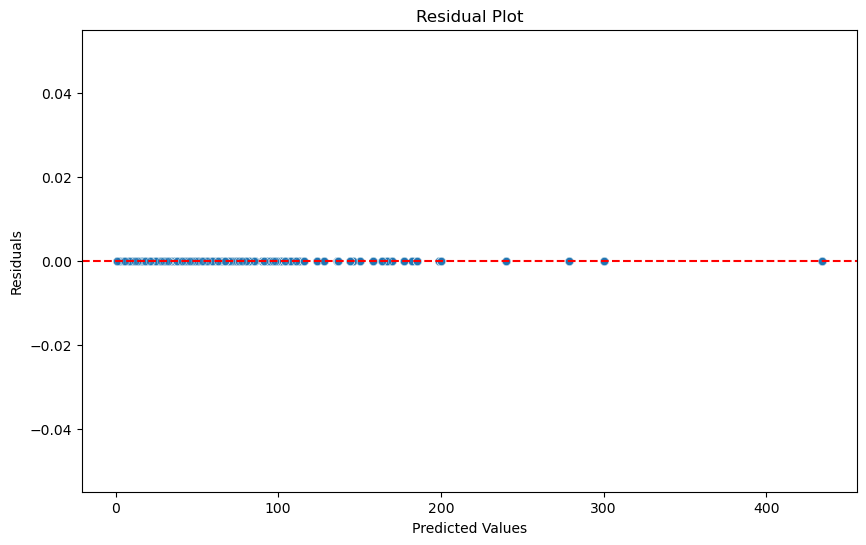

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


the results indicate that the model has perfectly predicted the test data but the model is overfitting or the target variable crime_count_location might not be varying much.

In [36]:
df.head()

,CASE#,DATE,BLOCK,IUCR,PRIMARY DESCRIPTION,SECONDARY DESCRIPTION,LOCATION DESCRIPTION,ARREST,DOMESTIC,BEAT,...,Y COORDINATE,LATITUDE,LONGITUDE,LOCATION,year,month,day_of_week,crime_count_location,daily_crime_count,monthly_crime_count
0,JG497095,2023-11-08 20:50:00,025XX N KEDZIE BLVD,0810,THEFT,OVER $500,STREET,N,N,1414,...,1916759.0,41.927407,-87.707294,"(41.927407329, -87.70729439)",2023,11,Wednesday,3,4,21281
1,JG496991,2023-11-08 15:14:00,0000X W CHICAGO AVE,0560,ASSAULT,SIMPLE,STREET,N,N,1832,...,1905725.0,41.896672,-87.628635,"(41.896671699, -87.628635323)",2023,11,Wednesday,9,1,21281
2,JG497145,2023-11-08 22:55:00,019XX W 47TH ST,051A,ASSAULT,AGGRAVATED - HANDGUN,SIDEWALK,N,N,931,...,1873509.0,41.808525,-87.672793,"(41.808525157, -87.672792896)",2023,11,Wednesday,1,1,21281
3,JH179051,2024-03-07 14:15:00,070XX S STATE ST,0820,THEFT,$500 AND UNDER,GROCERY FOOD STORE,Y,N,322,...,1858207.0,41.766247,-87.624933,"(41.766246905, -87.624932618)",2024,3,Thursday,9,2,20521
4,JH178785,2024-03-07 04:53:00,077XX S CARPENTER ST,0810,THEFT,OVER $500,STREET,N,N,612,...,1853451.0,41.753348,-87.650179,"(41.753347902, -87.650178718)",2024,3,Thursday,3,1,20521


In [37]:
print(df['crime_count_location'].describe())
print(df['crime_count_location'].value_counts())

count    258562.000000
mean         12.088582
std          32.726008
min           1.000000
25%           1.000000
50%           3.000000
75%           8.000000
max         434.000000
Name: crime_count_location, dtype: float64
1     85357
2     42070
3     24132
4     15336
5     11105
      ...  
77       77
71       71
68       68
64       64
61       61
Name: crime_count_location, Length: 119, dtype: int64


here the data has large concentration of low values which the target variable is highly imbalanced(many low values and fewer high values), in order to overcome this we can stratify the training and testing data.

In [38]:
# Define correct numerical and categorical columns
numerical_features = ['LATITUDE', 'LONGITUDE', 'year', 'month']
categorical_features = ['PRIMARY DESCRIPTION', 'ARREST', 'DOMESTIC', 'day_of_week']


In [39]:
# Create transformers

from sklearn.preprocessing import StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

In [41]:
from sklearn.metrics import mean_absolute_error, median_absolute_error

mae = mean_absolute_error(y_test, y_pred)
medae = mean_absolute_error(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('Median Absolute Error:', medae)

Mean Absolute Error: 18.25146481542359
Median Absolute Error: 18.25146481542359


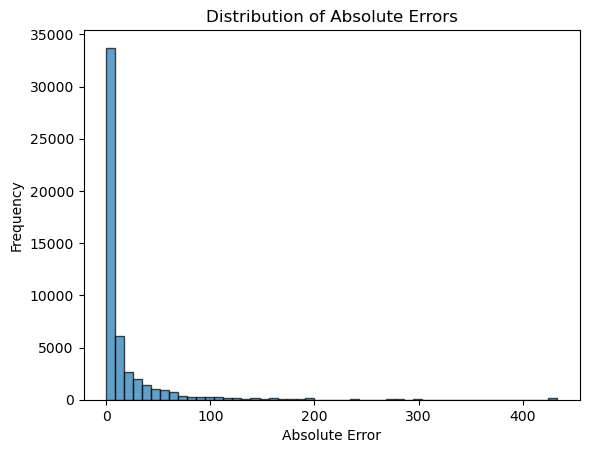

In [42]:
import matplotlib.pyplot as plt

# Compute errors
errors = y_test - y_pred
abs_errors = abs(errors)

# Plot distribution of absolute errors
plt.hist(abs_errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.show()


In [43]:
#Instead of simple train-test split, cross-validation will provide a better estimate of model performance
from sklearn.model_selection import cross_val_score

scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')
print('Cross-validated MSE:', -scores.mean())

Cross-validated MSE: -0.0


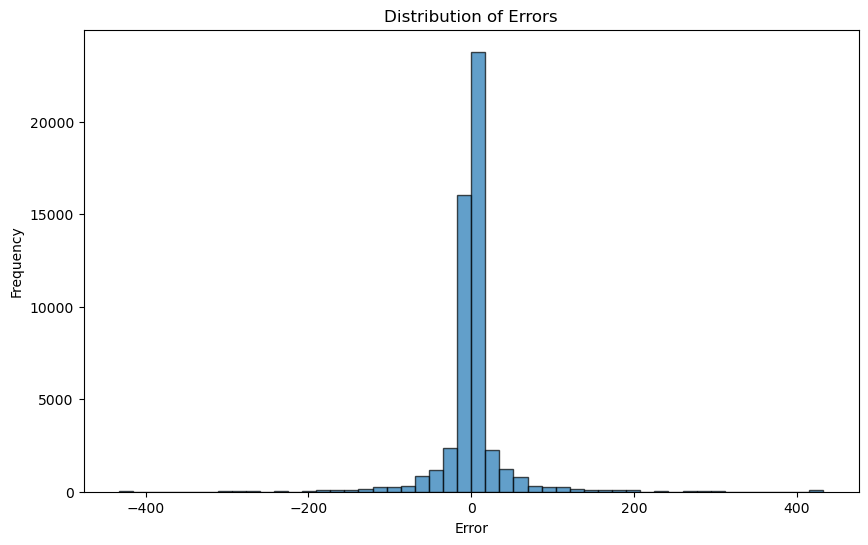

In [44]:
# Plot histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(errors, bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()


seeing the MSE score shows that the model is still overfitting 

In [45]:
# Ensure none of the features are leaking information
# Split the data
# Define features and target variable
X = df[numerical_features + categorical_features]
y = df['crime_count_location']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', Ridge(alpha=1.0))])

# Debug: Fit the pipeline and catch errors
try:
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print('Mean Squared Error:', mse)
    print('R-squared:', r2)
except Exception as e:
    print(f"Error during pipeline fit/predict: {e}")


Mean Squared Error: 945.0178580241453
R-squared: 0.07213933233627856


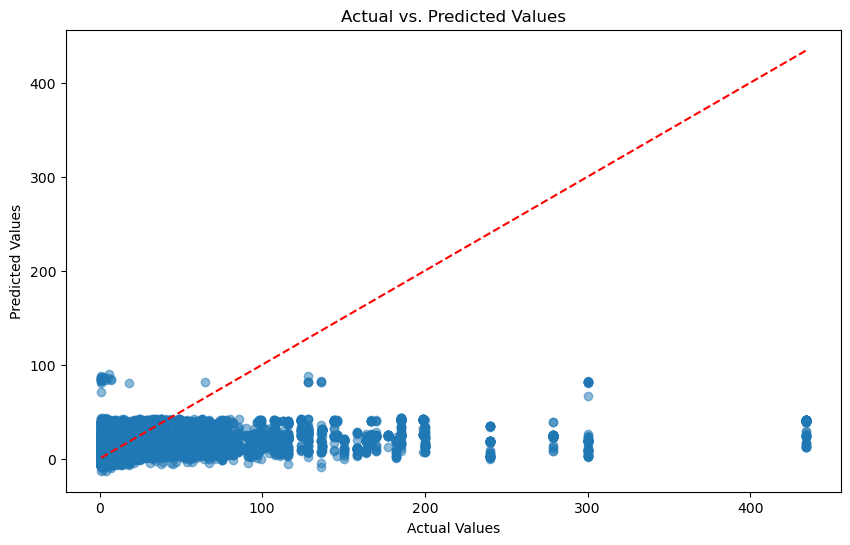

In [47]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='r', linestyle='--')
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [48]:
# Perform cross-validation
try:
    cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error', error_score='raise')
    print("Cross-validated MSE:", -cv_scores.mean())
except Exception as e:
    print(f"Error during cross-validation: {e}")


Cross-validated MSE: 995.9566865992332
